# Image Compression Using PCA

Principal Component Analysis (PCA) is a linear dimensionality reduction technique (algorithm) that transform a set of correlated variables (p) into a smaller k (k < p) number of uncorrelated variables called principal components while keeping as much of the variability in the original data as possible.

## Load the dataset

The [MNIST dataset](https://drive.google.com/file/d/1hboV-OLFfazEzV9tRqz7Nf1uoHU9jYO3/view?usp=sharing) contains the image data of handwritten digits. Since it is in the CSV file format, let’s load it using the Pandas read_csv() function.

In [1]:
import pandas as pd

mnist = pd.read_csv('mnist.csv')
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each row contains the pixel values of one single image. The pixels which make the image can be considered as dimensions (columns/variables) of the image data. The ‘label’ column contains the values of the digit (0–9). We do not need that column for our analysis because PCA is an unsupervised machine learning task that does not deal with labelled data. So, we can simply drop that column.

In [2]:
mnist.drop(columns='label', inplace=True)
mnist.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
mnist.shape

(60000, 784)

## Display an image

Let’s display the 2nd image (row) in the MNIST dataset. This image should contain the digit ‘0’ since the label column value of the 2nd row is ‘0’.

Text(0.5, 1.0, 'Second image: Digit 0')

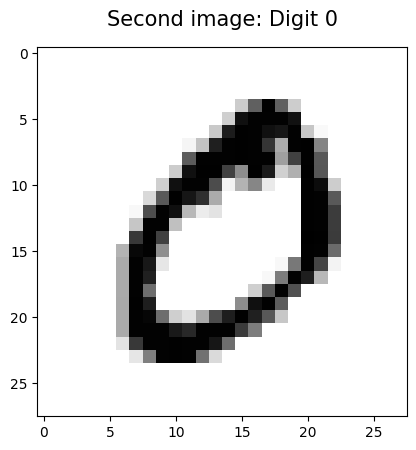

In [4]:
import matplotlib.pyplot as plt

second_image = mnist.iloc[1].values.reshape([28,28])
plt.imshow(second_image, cmap='gray_r')
plt.title('Second image: Digit 0', fontsize=15, pad=15)
# plt.savefig("Second image.png")

## Feature scaling

Since PCA directions are highly sensitive to the scale of the data, we must do feature scaling before applying PCA if the data is not measured on a similar scale.

In the MNIST dataset, the pixel values of each image are ranging from 0 to 255 (similar scale). For example:

In [5]:
#2nd image
print(mnist.iloc[1].min())
print(mnist.iloc[1].max())

0
255


Since our data is measured on a similar scale, we do not need to do feature scaling for PCA.

## Apply PCA

### Choose the right number of dimensions

First, we need to choose the right number of dimensions (i.e., the right number of principal components). For this, we apply PCA with the original number of dimensions (i.e., 784) and create the scree plot to see how well PCA captures the variance of the data.

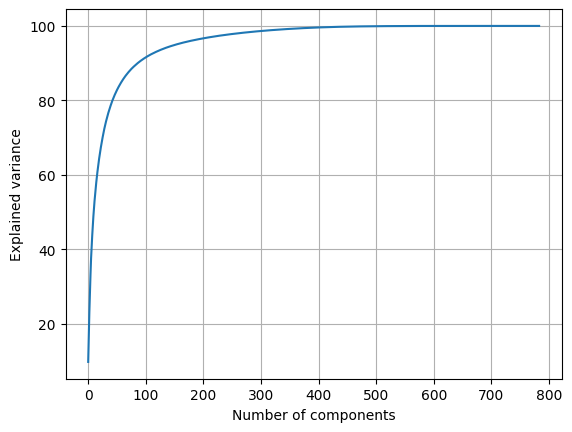

In [6]:
import numpy as np
from sklearn.decomposition import PCA

pca_784 = PCA(n_components=784)
pca_784.fit(mnist)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
# plt.savefig('Scree plot.png')

Let’s try using the first 10 components to compress the image. These components do not capture much of the variability in the original data. So, we will not get a clear image.

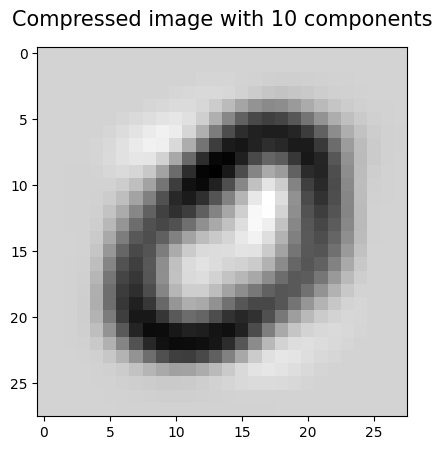

In [7]:
pca_10 = PCA(n_components=10)
mnist_pca_10_reduced = pca_10.fit_transform(mnist)
mnist_pca_10_recovered = pca_10.inverse_transform(mnist_pca_10_reduced)

image_pca_10 = mnist_pca_10_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_10, cmap='gray_r')
plt.title('Compressed image with 10 components', fontsize=15, pad=15)
# plt.savefig("image_pca_10.png")

Let’s try using the first 184 components to compress the image. About 96% variability in the original data is captured by the first 184 components. So, this time, we will get a very clear image much similar to the original one.

Text(0.5, 1.0, 'Compressed image with 184 components')

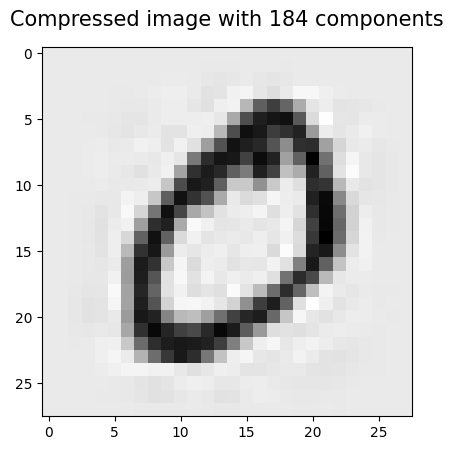

In [8]:
pca_184 = PCA(n_components=184)
mnist_pca_184_reduced = pca_184.fit_transform(mnist)
mnist_pca_184_recovered = pca_184.inverse_transform(mnist_pca_184_reduced)

image_pca_184 = mnist_pca_184_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_184, cmap='gray_r')
plt.title('Compressed image with 184 components', fontsize=15, pad=15)
# plt.savefig("image_pca_184.png")

We can also calculate the explained variance of 184 components:

In [9]:
np.cumsum(pca_184.explained_variance_ratio_ * 100)[-1]

96.11747299840818

After applying PCA on image data, the dimensionality has been reduced by 600 dimensions while keeping about 96% of the variability in the original image data! 

The `inverse_transform()` method of the pca object is used to decompress the reduced dataset back to 784 dimensions. This is very useful for visualizing the compressed image!

## References

* [Image Compression Using Principal Component Analysis (PCA)](https://towardsdatascience.com/image-compression-using-principal-component-analysis-pca-253f26740a9f)